In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 패스트볼의 회전수(Spin Rate)
   

패스트볼은 공의 회전수에 의해 어떤 영향을 받을까? 공의 회전수가 패스트볼에 미치는 영향을 확인하기 위해, MLB에서 대표적으로 고회전 패스트볼을 던지는 투수(트레버 바우어)와 저회전 패스트볼을 던지는 투수(카일 헨드릭스)의 데이터를 비교해본다.
   
**2020시즌 바우어 (포심패스트볼) vs 헨드릭스 (싱커, 투심패스트볼)**

In [2]:
bauer = pd.read_csv('bauer_ff_20.csv')
kyle = pd.read_csv('hendricks_si_20.csv')

In [3]:
bauer.drop(['des','game_type','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1, inplace=True)
kyle.drop(['des','game_type','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1, inplace=True)

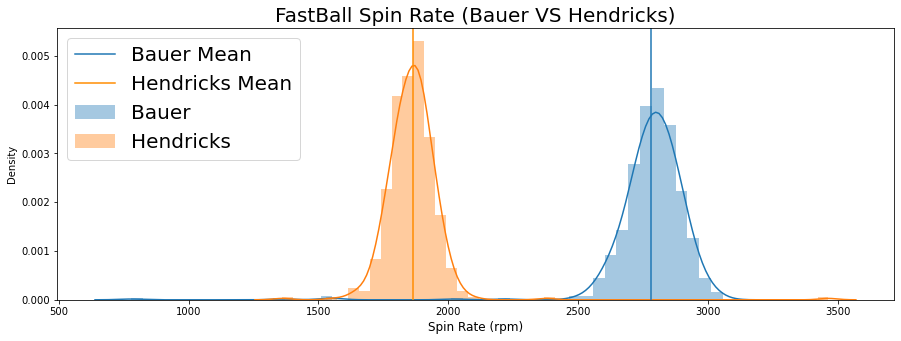

In [4]:
plt.figure(figsize=(15,5))
sns.distplot(bauer['release_spin_rate'], label='Bauer')
sns.distplot(kyle['release_spin_rate'], label='Hendricks')
plt.axvline(round(bauer['release_spin_rate'].mean(),2), label='Bauer Mean')
plt.axvline(round(kyle['release_spin_rate'].mean(),2), label='Hendricks Mean', color='darkorange')
plt.legend(prop={'size': 20})
plt.title('FastBall Spin Rate (Bauer VS Hendricks)', size=20)
plt.xlabel('Spin Rate (rpm)', size=12)
plt.show()

In [5]:
(round(bauer['release_spin_rate'].mean(),2),round(kyle['release_spin_rate'].mean(),2))

(2779.42, 1862.29)

바우어의 평균 회전수는 2779.42 rpm, 헨드릭스의 평균 회전수는 1862.29 rpm 이다.
***************

## 1. 구속 비교

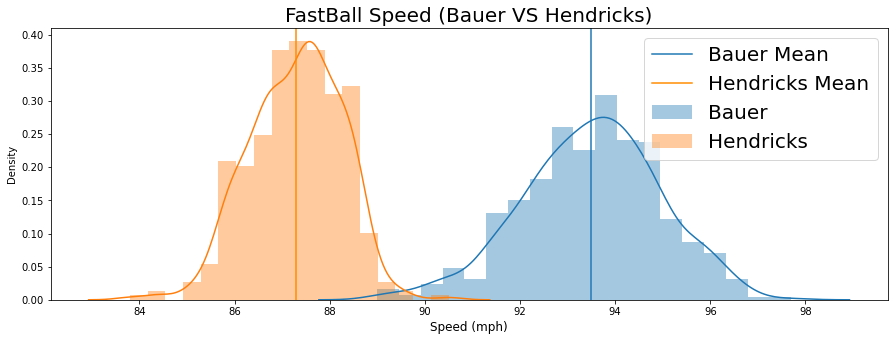

In [6]:
plt.figure(figsize=(15,5))
sns.distplot(bauer['release_speed'], label='Bauer')
sns.distplot(kyle['release_speed'], label='Hendricks')
plt.axvline(round(bauer['release_speed'].mean(),2), label='Bauer Mean')
plt.axvline(round(kyle['release_speed'].mean(),2), label='Hendricks Mean', color='darkorange')
plt.legend(prop={'size': 20})
plt.title('FastBall Speed (Bauer VS Hendricks)', size=20)
plt.xlabel('Speed (mph)', size=12)
plt.show()

In [7]:
(round(bauer['release_speed'].mean(),2),round(kyle['release_speed'].mean(),2))

(93.5, 87.3)

바우어의 패스트볼 평균 구속은 93.5 mph, 헨드릭스의 패스트볼 평균 구속은 87.3 mph 이다.
***************

### 1-1 구속과 회전수

메이저리그 전체 포심패스트볼 데이터를 통해 구속과 회전수의 상관관계를 분석해보면, 유의미한 결과를 얻을 수 있다.

In [17]:
# 메이저리그 패스트볼(포심+싱커)
ff = pd.read_csv('2020_ff.csv')
si = pd.read_csv('2020_si.csv')
total_fastball = pd.concat([ff, si])

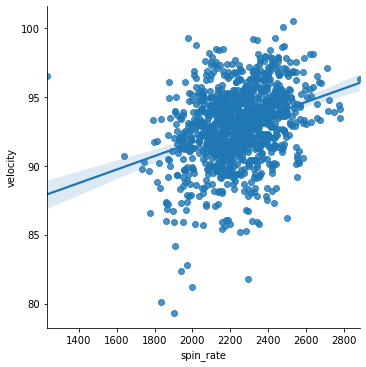

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               velocity   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     73.12
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           8.47e-17
Time:                        23:55:54   Log-Likelihood:                -1547.8
No. Observations:                 662   AIC:                             3100.
Df Residuals:                     660   BIC:                             3109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7731      1.323     61.831      0.000      79.176      84.370
spin_rate      0.0050      0.001      8.551      0.000       0.004       0.006
==============================================================================
Omnibus:                       76.360   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.441
Skew:                          -0.691   Prob(JB):                     3.54e-33
Kurtosis:                       4.872   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.formula.api as smf

sns.lmplot(x='spin_rate', y='velocity', data=total_fastball)
plt.show()
reg_1 = smf.ols(formula = 'velocity ~ spin_rate', data=ff).fit()
reg_1.summary()

위의 회귀분석 결과에 의하면, spin_rate가 1rpm 증가할때마다 구속이 0.5mph 증가한다. p-value를 통해 통계적으로 유의한 결과임을 알 수 있다.
*************

## 2. 스트라이크 존 비교

공의 회전수가 높으면 이상적인 공의 이동경로보다 높게 떠오른다. 공기 중 공의 회전으로 인한 마그누스 효과때문인데, 이 효과에 의하면 공의 회전수가 클수록 공이 더 떠오르게 되고 스트라이크 존 위쪽에 분포하게 될 것이다.(실제로 공이 떠오른다는 것이 아니라 이상적인 경로에 비해 상대적으로 위쪽에 분포한다는 뜻)   
   
바우어의 공이 회전수가 더 크기 때문에 헨드릭스의 공보다 스트라이크 존 위쪽에 분포할 것이다.


In [10]:
bauer_kyle = pd.concat([bauer, kyle])

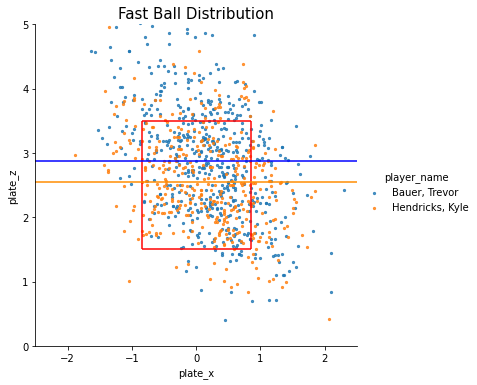

In [11]:
sns.lmplot(data=bauer_kyle, x='plate_x', y='plate_z', hue='player_name', fit_reg=False, scatter_kws={"s": 5})
plt.title('Fast Ball Distribution', size=15)
plt.axhline(bauer_kyle[bauer_kyle['player_name']=='Bauer, Trevor']['plate_z'].mean(), color='b')
plt.axhline(bauer_kyle[bauer_kyle['player_name']=='Hendricks, Kyle']['plate_z'].mean(), color='darkorange')
plt.xlim(-2.5,2.5)
plt.ylim(0,5)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

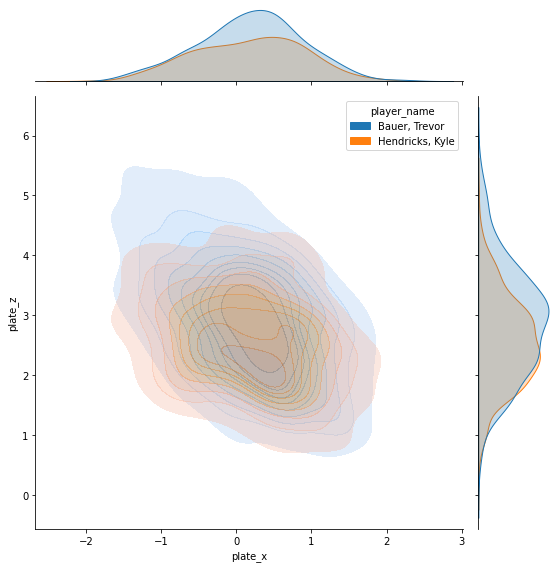

In [12]:
sns.jointplot(x='plate_x', y='plate_z',hue='player_name', height=8, data=bauer_kyle, kind='kde',fill=True, joint_kws={'alpha': 0.3})
plt.show()

두 투수의 투구 분포도를 보았을 때, 분포도의 정가운데 부분(가장 안쪽 등고선, 가장 높은 분포 위치)를 확인해보면 헨드릭스의 투구가 바우어보다 아래쪽에 위치한다는 것을 알 수 있다. plate_z 데이터의 평균값을 확인해도 작은 차이지만 헨드릭스의 투구 분포가 아래쪽에 위치해있다는 것을 말해준다.
****************

## 3. 이벤트 비교

두 투수의 패스트볼에 의한 이벤트가 어떤 차이가 있는지 분석해본다.

### 3-1. 헛스윙 비율 (Swing and Miss %)

타자가 배트를 휘둘렀을때 나올 수 있는 상황: hit_into_play, foul, swinging_strike, foul_tip   
swinging_strike와 foul_tip을 헛스윙으로 하여 비율을 계산하였다.

In [13]:
bauer_des = bauer['description'].value_counts().reset_index()
col = bauer_des.transpose().iloc[0]
bauer_desc = bauer_des.transpose()[1:]
bauer_desc.columns = col
bauer_sm_perc = (bauer_desc['swinging_strike']+bauer_desc['foul_tip'])/(bauer_desc['foul']+bauer_desc['hit_into_play']+bauer_desc['swinging_strike']+bauer_desc['foul_tip'])

In [14]:
kyle_des = kyle['description'].value_counts().reset_index()
col = kyle_des.transpose().iloc[0]
kyle_desc = kyle_des.transpose()[1:]
kyle_desc.columns = col
kyle_sm_perc = (kyle_desc['swinging_strike']+kyle_desc['foul_tip'])/(kyle_desc['foul']+kyle_desc['hit_into_play']+kyle_desc['swinging_strike']+kyle_desc['foul_tip'])

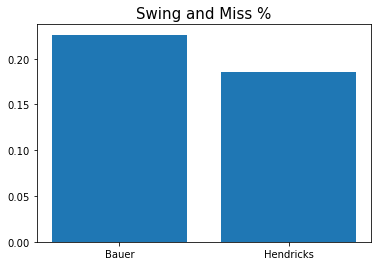

In [15]:
x = ['Bauer', 'Hendricks']
value = [bauer_sm_perc[0], kyle_sm_perc[0]]
plt.bar(x,value)
plt.title('Swing and Miss %', size=15)
plt.show()

In [16]:
print('바우어 헛스윙 비율: {0}%, 헨드릭스 헛스윙 비율:{1}%'.format(round(bauer_sm_perc[0],2)*100, round(kyle_sm_perc[0],2)*100))

바우어 헛스윙 비율: 23.0%, 헨드릭스 헛스윙 비율:19.0%


바우어의 패스트볼 헛스윙 비율이 4% 포인트 더 높았다.

### 3-2. Hit_in_Play 아웃 비율

In [19]:
bauer.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,zone,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,release_spin_rate,release_extension,game_pk,release_pos_y,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,spin_axis
0,FF,2020-09-23,92.3,-1.46,5.76,"Bauer, Trevor",553882,545333,NaN,called_strike,NaN,3,L,R,CIN,MIL,S,NaN,NaN,1,0,-0.70,1.64,0.36,2.79,NaN,NaN,NaN,1,8,NaN,NaN,6.162870,-134.159241,-5.244842,-9.844382,30.613650,-11.476058,3.31,1.48,NaN,NaN,NaN,2605,6.3,631583,54.23,NaN,57,2,4-Seam Fastball,6,1,211
1,FF,2020-09-23,90.6,-1.59,5.64,"Bauer, Trevor",519299,545333,field_out,hit_into_play,NaN,2,L,R,CIN,MIL,X,9.0,fly_ball,0,0,-0.82,1.61,-0.05,3.18,NaN,NaN,NaN,0,8,181.07,57.19,5.588605,-131.852665,-3.659780,-10.712747,28.952586,-12.785677,3.30,1.50,358.0,92.2,30.0,2604,6.4,631583,54.11,3.0,56,1,4-Seam Fastball,6,1,209
2,FF,2020-09-23,93.8,-1.49,5.72,"Bauer, Trevor",607054,545333,strikeout,swinging_strike,NaN,2,L,R,CIN,MIL,S,2.0,NaN,3,2,-0.66,1.61,-0.04,3.34,NaN,NaN,NaN,1,7,NaN,NaN,5.203853,-136.551183,-3.983725,-9.375352,29.761472,-11.322501,3.25,1.52,NaN,NaN,NaN,2712,6.3,631583,54.16,NaN,51,6,4-Seam Fastball,6,1,208
3,FF,2020-09-23,92.8,-1.51,5.78,"Bauer, Trevor",607054,545333,NaN,ball,NaN,11,L,R,CIN,MIL,B,NaN,NaN,2,2,-0.70,1.66,-1.21,5.14,NaN,NaN,NaN,1,7,NaN,NaN,2.317809,-135.197767,0.516791,-9.074736,30.433125,-12.194232,3.23,1.56,NaN,NaN,NaN,2793,6.3,631583,54.16,NaN,51,5,4-Seam Fastball,6,1,206
4,FF,2020-09-23,91.9,-1.49,5.78,"Bauer, Trevor",669374,545333,NaN,foul,NaN,1,R,R,CIN,MIL,S,NaN,NaN,2,1,-0.81,1.55,-0.29,3.21,NaN,NaN,NaN,0,7,NaN,NaN,4.802290,-133.793025,-4.059273,-10.791108,28.522170,-12.839024,3.42,1.58,172.0,74.3,65.0,2675,6.4,631583,54.13,NaN,50,4,4-Seam Fastball,6,1,210


In [29]:
bauer_bb = bauer['bb_type'].value_counts().reset_index()
kyle_bb = kyle['bb_type'].value_counts().reset_index()


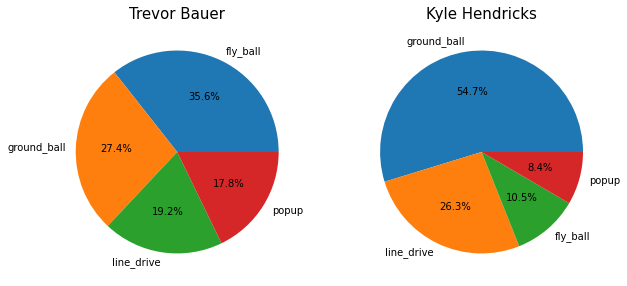

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(bauer_bb['bb_type'], labels=bauer_bb['index'], autopct='%.1f%%')
plt.title('Trevor Bauer', size=15)
plt.subplot(1,2,2)
plt.pie(kyle_bb['bb_type'], labels=kyle_bb['index'], autopct='%.1f%%')
plt.title('Kyle Hendricks', size=15)
plt.show()

바우어의 경우 플라이볼, 땅볼 순으로 비중이 높았지만, **헨드릭스는 압도적으로 땅볼 비중(54.7%)이 높았고, 플라이볼은 10.5%으로 낮았다.** 이 데이터를 확인해보면, 헨드릭스의 타구는 대부분 ground_ball이나 line_drive처럼 타구가 높게 뜨지 않는다는 것을 볼 수 있다.
***************

## 결론

2020시즌 트레버 바우어와 카일 헨드릭스의 패스트볼 비교를 해보았다. 바우어는 평균 회전수는 2779.42rpm의 고속 회전 패스트볼을 구사하는 반면에 헨드릭스는 평균 회전수는 1862.29rpm의 저속 회전 패스트볼을 구사한다.   
   
두 선수의 패스트볼 구속을 비교해보면 회전수에 비례하여 트레버가 더 빠른 구속을 보여준다(바우어: 93.5 mph, 헨드릭스 87.3 mph). 패스트볼의 회전수와 구속은 양의 상관관계에 있는데, 메이저리그 전체 데이터를 확인해보면 회전수가 1rpm 증가하면 구속은 약 0.5mph 증가하는 경향을 보인다.   
   
투수가 던진 공의 회전은 마그누스 효과를 일으킨다. 회전에 의해 공 주변 기압에 변화를 일으켜 무브먼트에 영향을 주는데, 이 효과 때문에 회전이 빠른 공은 느린 공보다 수직 변화가 적다. 바우어와 헨드릭스의 스트라이크 존 비교를 해보면, 고회전의 바우어보다 저회전의 헨드릭스의 투구가 아래쪽에 분포하는 것을 확인할 수 있다.   
   
두 투수의 타구 특징을 비교해보았다. 바우어의 패스트볼이 헨드릭스보다 헛스윙 비율이 높았다. 인필드 아웃 비중을 살펴보면 헨드릭스의 지표가 눈에 띄는데, 상당 부분이 땅볼 혹은 라인드라이브성 타구인 것을 볼 수 있었고 이는 타구가 높게 뜨지 않는 땅볼 비중이 대부분인 것을 확인할 수 있었다.   
   
바우어의 투구는 고회전으로 인해 스트라이크 존 위쪽에 분포하고, 이는 타자에게 공이 떠오르는듯한 느낌을 들게하여 헛스윙을 유발하고, 헨드릭스의 투구는 저회전으로 인해 스트라이크 존 아래쪽에 분포하고, 이는 땅볼 타구를 유도하는 것으로 판단된다.